## Building Regression Model and Regression Diagnostics with Base R package

In [42]:
# Building Regression Model
states <- as.data.frame(state.x77[,c("Murder", "Population",
                                     "Illiteracy", "Income", "Frost")])
fit <- lm(Murder ~ Population + Illiteracy + Income + Frost, data=states)
summary(fit)


Call:
lm(formula = Murder ~ Population + Illiteracy + Income + Frost, 
    data = states)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.7960 -1.6495 -0.0811  1.4815  7.6210 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 1.235e+00  3.866e+00   0.319   0.7510    
Population  2.237e-04  9.052e-05   2.471   0.0173 *  
Illiteracy  4.143e+00  8.744e-01   4.738 2.19e-05 ***
Income      6.442e-05  6.837e-04   0.094   0.9253    
Frost       5.813e-04  1.005e-02   0.058   0.9541    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.535 on 45 degrees of freedom
Multiple R-squared:  0.567,	Adjusted R-squared:  0.5285 
F-statistic: 14.73 on 4 and 45 DF,  p-value: 9.133e-08


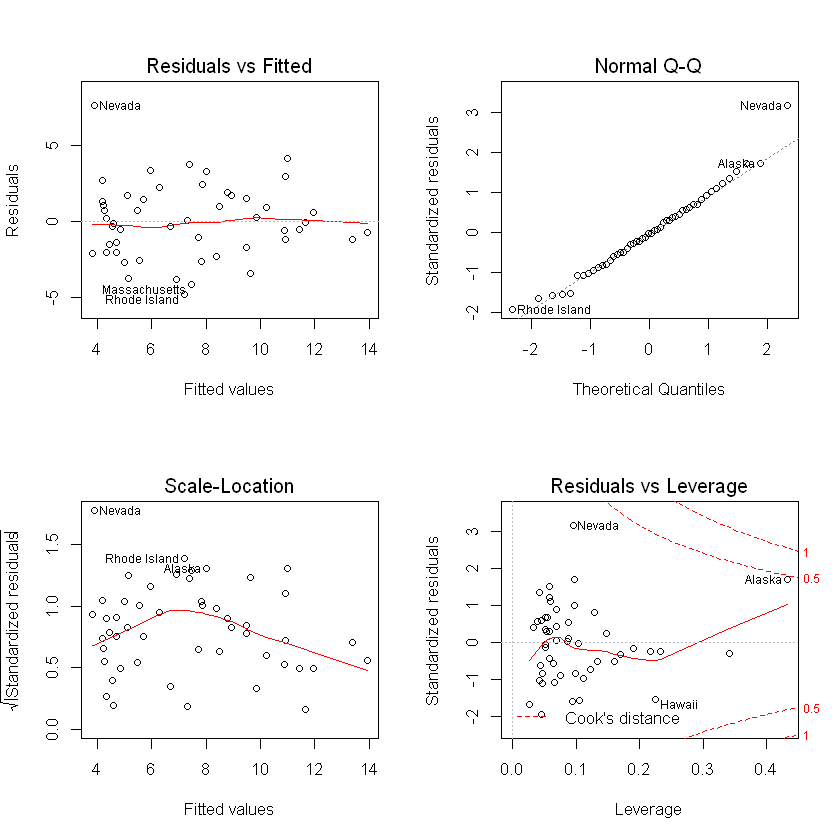

In [6]:
par(mfrow = c(2,2))
plot(fit)

Based on the Assumptions of OLS:
* Normality —If the dependent variable is normally distributed for a fixed set of predictor values, then the residual values should be normally distributed with a mean of 0. 
	* The Normal Q-Q plot (upper right) is a probability plot of the standardized residuals against the values that would be expected under normality. If you’ve met the normality assumption, the points on this graph should fall on the straight 45-degree line. Because they don’t, you’ve clearly violated the normality assumption.
* Independence —You can’t tell if the dependent variable values are independent from these plots. You have to use your understanding of how the data were collected.
* Linearity —If the dependent variable is linearly related to the independent variables, there should be no systematic relationship between the residuals and the predicted (that is, fitted) values. In other words, the model should capture all the systematic variance present in the data, leaving nothing but random noise. Residuals versus Fitted graph (upper left), indicates a linear relationship.
* Homoscedasticity —If you’ve met the constant variance assumption, the points in the Scale-Location graph (bottom left) should be a random band around a horizontal line. 
* Outlier Analysis —Residual versus Leverage graph (bottom right) provides information on individual observations that you may wish to attend to. The graph identifies outliers, high-leverage points, and influential observations

## Enhanced Regression Diagnostics using car Package

In [7]:
library(car)

Warning message:
"package 'car' was built under R version 3.4.1"

## Testing Assumption: Normality
We test the assumption of Normality using: Q-Q Plot and a Histogram of Studentized Residuals

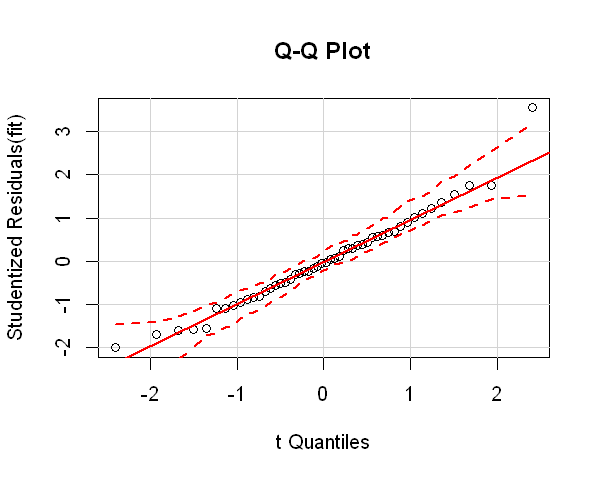

In [11]:
options(repr.plot.width=5, repr.plot.height=4)
qqPlot(fit,labels = row.names(states) , id.method="identify", simulate=TRUE, main="Q-Q Plot") #Interactive Plot

Analyzing the Point - Nevada that does not fall on the Normal Line.
We note that: Murder rate in Nevada is 11.5% but the model predicts it as 3.87%

In [12]:
states["Nevada",]
fitted(fit)["Nevada"]
residuals(fit)["Nevada"]
rstudent(fit)["Nevada"]

,Murder,Population,Illiteracy,Income,Frost
Nevada,11.5,590,0.5,5149,188


Nevada 
3.878958

Nevada 
7.621042

Nevada 
3.542929

### Plotting Histogram of Studentized Reisduals
The residplot() function generates a histogram of the studentized residuals and superimposes a normal curve, kernel density curve, and rug plot. We see that the errors follow a normal distribution quite well, with the exception of a large outlier. Although the Q-Q plot is probably more informative,it's easier to gauge the skew of a distribution from a histogram or density plot than from a probability plot.

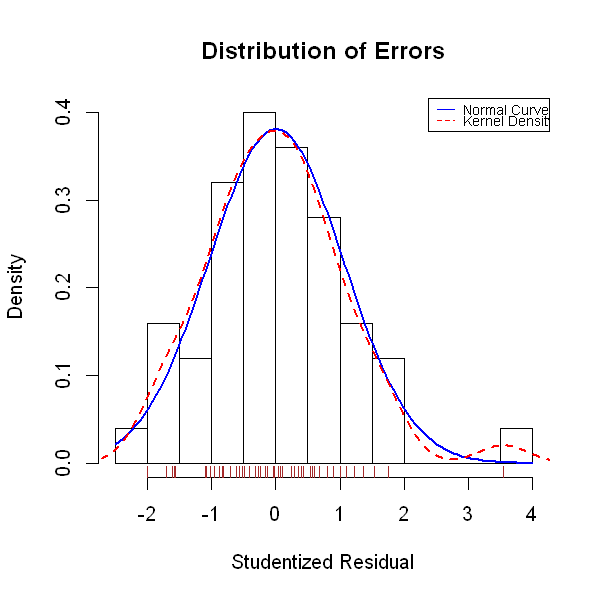

In [19]:
options(repr.plot.width=5, repr.plot.height=5)
residplot <- function(fit, nbreaks=10) {
    z <- rstudent(fit)
    hist(z, breaks=nbreaks, freq=FALSE,
    xlab="Studentized Residual",
    main="Distribution of Errors")
    rug(jitter(z), col="brown")
    curve(dnorm(x, mean=mean(z), sd=sd(z)),
    add=TRUE, col="blue", lwd=2)
    lines(density(z)$x, density(z)$y,
    col="red", lwd=2, lty=2)
    legend("topright",
    legend = c( "Normal Curve", "Kernel Density Curve"),
    lty=1:2, col=c("blue","red"), cex=.7)
    }
residplot(fit)

## Testing Assumption: Independence of Errors:
The car package provides a function for the Durbin–Watson test to detect auto-correlation among the observations.
Null Hypothesis: Auto-correlation is present in the data
A non-significant p-value indicates a lack of Auto-correlation and conversely an independence of errors.

Note: The test is applicable only for time-dependent data. If the data is not clustered around time, then the test is not applicable.

In [20]:
durbinWatsonTest(fit)

 lag Autocorrelation D-W Statistic p-value
   1      -0.2006929      2.317691   0.282
 Alternative hypothesis: rho != 0

## Testing Assumption: Linearity
The car package provides the Component+Residual Plots to test the linearity assumption.

Component residual plots, an extension of partial residual plots, are a good way to see if the predictors have a linear relationship to the dependent variable. A partial residual plot essentially attempts to model the residuals of one predictor against the dependent variable. A component residual plot adds a line indicating where the line of best fit lies. A significant difference between the residual line and the component line indicates that the predictor does not have a linear relationship with the dependent variable.

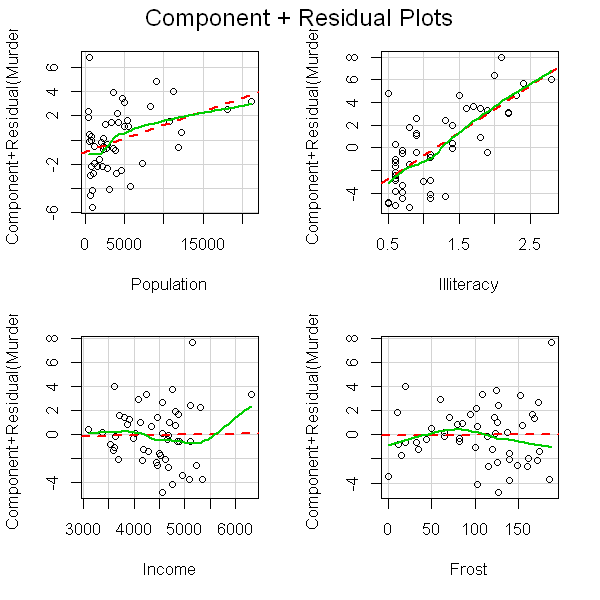

In [21]:
crPlots(fit)

## Testing Assumption: HOMOSCEDASTICITY
Car pacakge provides two usefull functions: 
* ncvTest() - produces a score test of the hypothesis of constant error variance against the alternative that the error variance changes with the level of the fitted values. A significant result suggests heteroscedasticity (nonconstant error variance)
* spreadLevelPlot() - creates a scatter plot of the absolute standardized
residuals versus the fitted values, and superimposes a line of best fit.

In [24]:
ncvTest(fit)

Non-constant Variance Score Test 
Variance formula: ~ fitted.values 
Chisquare = 1.746514    Df = 1     p = 0.1863156 


Suggested power transformation:  1.209626 

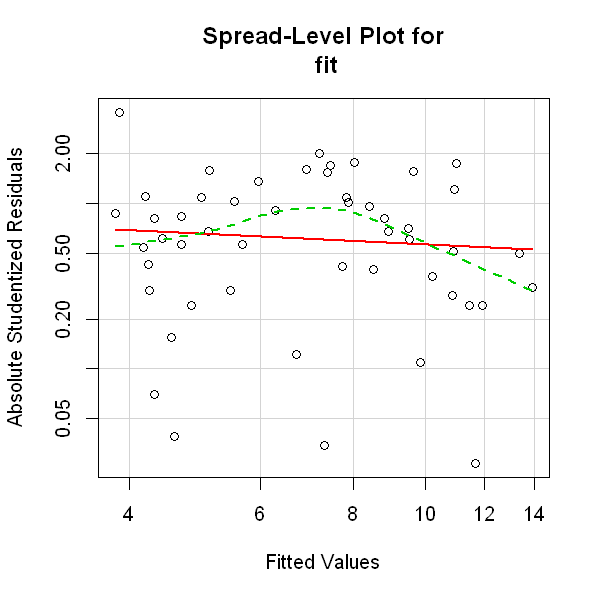

In [25]:
spreadLevelPlot(fit)

NCV Test:
The score test is nonsignificant (p = 0.19), suggesting that you’ve met the constant variance assumption. 

Spread Level Plot:
* The points form a random horizontal band around a horizontal line of best fit. If you’d violated the assumption, you’d expect to see a nonhorizontal line. The suggested power transformation is the suggested power p (Y^p) that would stabilize the
nonconstant error variance. 
* For example, if the plot showed a nonhorizontal trend and the suggested power transformation was 0.5, then using sqrt(Y) rather than Y in the regression equation might lead to a model that satisfies homoscedasticity. 
* If the suggested power was 0, you’d use a log transformation. 
* In the current example, there’s no evidence of heteroscedasticity & suggested power is close to 1 (no transformation required).

### Global Validation of linear model assumption using the gvlma() package:
The gvlma() function performs a global validation of linear model assumptions as well as separate evaluations of skewness, kurtosis, and heteroscedasticity. In other words, it provides a single omnibus (go/no go) test of model assumptions.

In [43]:
library(gvlma)
gvmodel <- gvlma(fit)
summary(gvmodel)

Warning message:
"package 'gvlma' was built under R version 3.4.1"


Call:
lm(formula = Murder ~ Population + Illiteracy + Income + Frost, 
    data = states)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.7960 -1.6495 -0.0811  1.4815  7.6210 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 1.235e+00  3.866e+00   0.319   0.7510    
Population  2.237e-04  9.052e-05   2.471   0.0173 *  
Illiteracy  4.143e+00  8.744e-01   4.738 2.19e-05 ***
Income      6.442e-05  6.837e-04   0.094   0.9253    
Frost       5.813e-04  1.005e-02   0.058   0.9541    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.535 on 45 degrees of freedom
Multiple R-squared:  0.567,	Adjusted R-squared:  0.5285 
F-statistic: 14.73 on 4 and 45 DF,  p-value: 9.133e-08


ASSESSMENT OF THE LINEAR MODEL ASSUMPTIONS
USING THE GLOBAL TEST ON 4 DEGREES-OF-FREEDOM:
Level of Significance =  0.05 

Call:
 gvlma(x = fit) 

                    Value p-value                Decision
Global Stat        2.7728  0.5965 

## Outlier Analysis:

* Outliers are observations that aren’t predicted well by the model. They have either unusually large positive or negative residuals. 
    * Points in Q-Q Plot that lie outside the confidence band are Outliers
    * Statistical Test: outlierTest() function reports the Bonferroni adjusted p-value for the largest absolute studentized residual. Note that this function tests the single largest (positive or negative) residual for significance as an outlier. If it isn’t significant, there are no outliers in the dataset. If it is significant, you must delete it and rerun the test to see if others are present.
* High Leverage Points: Observations that have high leverage are outliers with regard to the other predictors. In other words, they have an unusual combination of predictor values
    * Observations with high leverage are identified through the hat statistic. 
    * For a given dataset, the average hat value is p/n, where p is the number of parameters estimated in the model (including the intercept) and n is the sample size. 
    * Roughly speaking, an observation with a hat value greater than 2 or 3 times the average hat value should be examined.
* Influential observations: observations that have a disproportionate impact on the values of the model parameters. There are two ways to find the influential observations:
    * Cook’s distance or D statistic - Cook’s D values greater than 4/(n-k-1), where n is the sample size and k is the number of predictor variables, indicate influential observations. Note that although it’s useful to cast a wide net when searching for influential observations, we generally use the criterion of D = 1. 
    * Added Variable Plots:
        * Cook’s D plots can help identify influential observations, but they don’t provide information on how these observations affect the model. Added-variable plots can help in this regard.
        * For one response variable and k predictor variables, you’d create k added-variable plots. 
        * Added-variable plots can be created using the avPlots() function
* Influence Plot combines the information from Outlier, Leverage and Influential Observations. 
    * influencePlot() 
    * It indicates that: 
        * States above +2 or below –2 on the vertical axis are considered outliers. 
        * States above 0.2 or 0.3 on the horizontal axis have high leverage (unusual combinations of predictor values). 
        * Circle size is proportional to influence. Observations depicted by large circles may have disproportionate influence on the parameters estimates of the model.

In [26]:
# To find teh biggest Outlier:
outlierTest(fit)

       rstudent unadjusted p-value Bonferonni p
Nevada 3.542929         0.00095088     0.047544

integer(0)

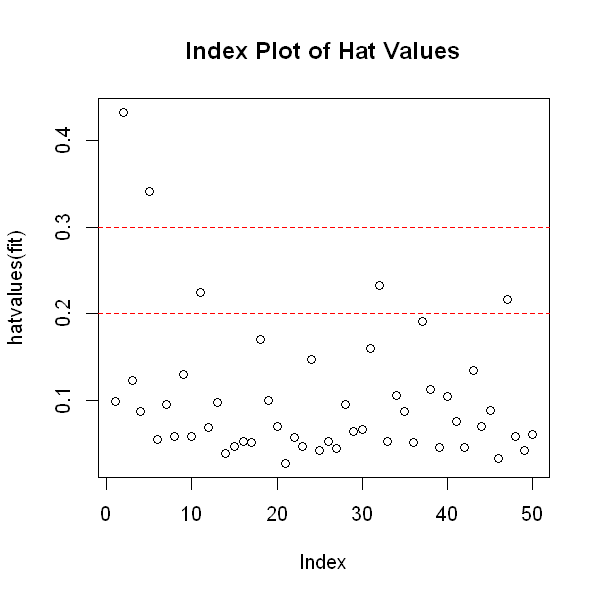

In [27]:
#To find the Leverage Points. The below code is interactive and does not work fully in Jupyter Notebook
hat.plot <- function(fit) {
    p <- length(coefficients(fit))
    n <- length(fitted(fit))
    plot(hatvalues(fit), main="Index Plot of Hat Values")
    abline(h=c(2,3)*p/n, col="red", lty=2)
    identify(1:n, hatvalues(fit), names(hatvalues(fit)))
    }
hat.plot(fit)

Horizontal lines are drawn at 2 and 3 times the average hat value. The locator function places the graph in interactive mode. Clicking on points of interest labels them until the user presses Esc, selects Stop from the graph drop-down menu, or right-clicks on the graph. Here you see that 
* Alaska and California are particularly unusual when it comes to their predictor values. 
* Alaska has a much higher income than other states, while having a lower population and temperature. 
* California has a much higher population than other states, while having a higher income and higher temperature. 
* These states are atypical compared with the other 48 observations.

Note: High leverage observations may or may not be influential observations. That will depend on whether they’re also outliers.

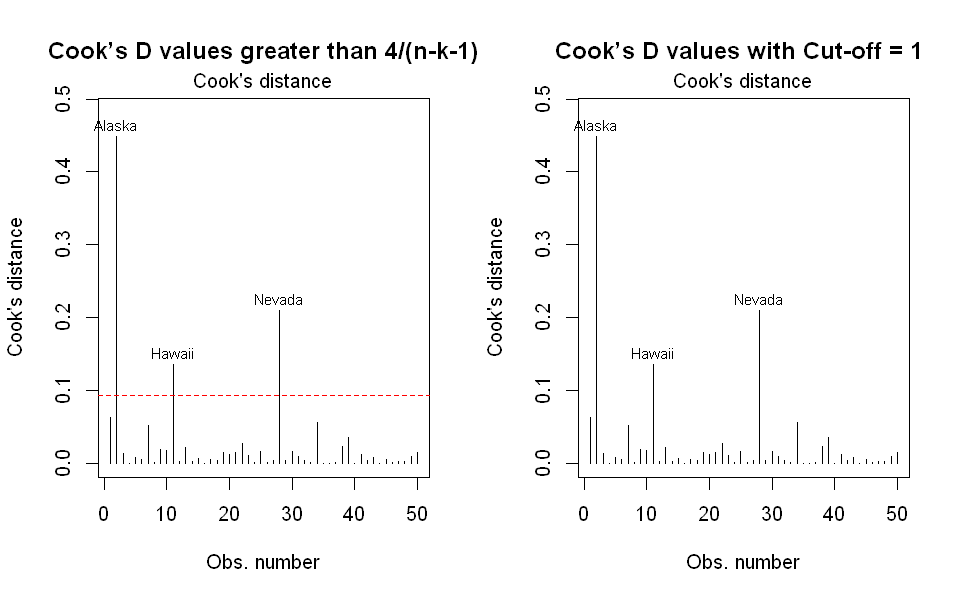

In [34]:
# Finding Influential Points using Cook's Distance:
options(repr.plot.width=8, repr.plot.height=5)
par(mfrow = c(1,2))

cutoff <- 4/(nrow(states)-length(fit$coefficients)-2)
plot(fit, which=4, cook.levels=cutoff)
abline(h=cutoff, lty=2, col="red")
title("Cook’s D values greater than 4/(n-k-1)")

plot(fit, which=4, cook.levels=1)
abline(h=1, lty=2, col="red")
title("Cook’s D values with Cut-off = 1 ")

The graph identifies Alaska, Hawaii, and Nevada as influential observations. Deleting these states will have a notable impact on the values of the intercept and slopes in the regression model. Given a criterion of D=1, none of the observations in the dataset appear to be influential.

Warning message in plot.window(...):
""onepage" is not a graphical parameter"Warning message in plot.xy(xy, type, ...):
""onepage" is not a graphical parameter"Warning message in axis(side = side, at = at, labels = labels, ...):
""onepage" is not a graphical parameter"Warning message in axis(side = side, at = at, labels = labels, ...):
""onepage" is not a graphical parameter"Warning message in box(...):
""onepage" is not a graphical parameter"Warning message in title(...):
""onepage" is not a graphical parameter"Warning message in plot.xy(xy.coords(x, y), type = type, ...):
""onepage" is not a graphical parameter"Warning message in plot.window(...):
""onepage" is not a graphical parameter"Warning message in plot.xy(xy, type, ...):
""onepage" is not a graphical parameter"Warning message in axis(side = side, at = at, labels = labels, ...):
""onepage" is not a graphical parameter"Warning message in axis(side = side, at = at, labels = labels, ...):
""onepage" is not a graphical parameter"W

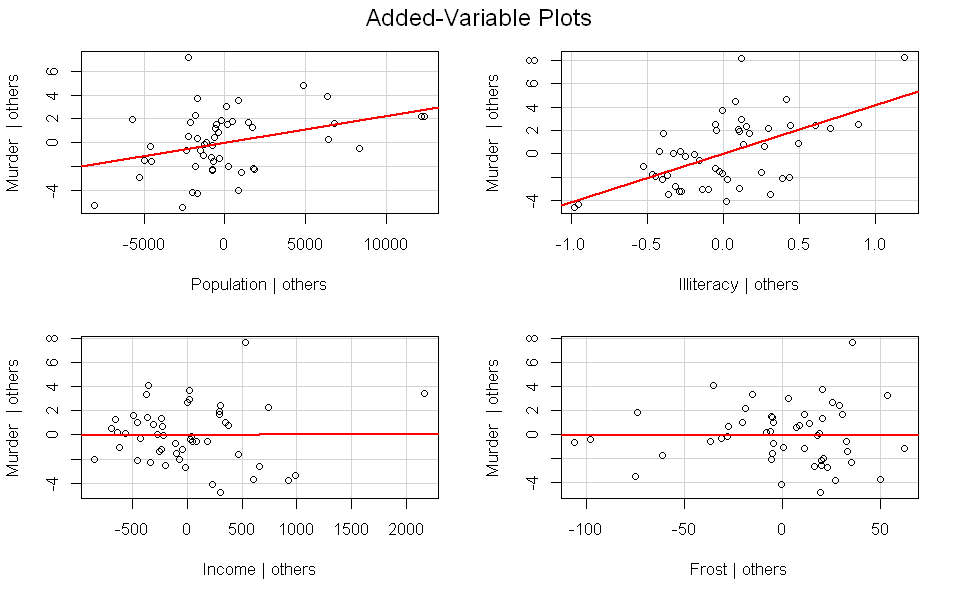

In [35]:
library(car)
avPlots(fit, ask=FALSE, onepage=TRUE, id.method="identify")

The straight line in each plot is the actual regression coefficient for that predictor variable. You can see the impact of influential observations by imagining how the line would change if the point representing that observation was deleted. For example, look at the graph of Murder | others versus Income | others in the lower-left corner. You can see that eliminating the point labeled Alaska would move the line in a negative direction. In fact, deleting Alaska changes the regression coefficient for Income from positive (.00006) to negative (–.00085).

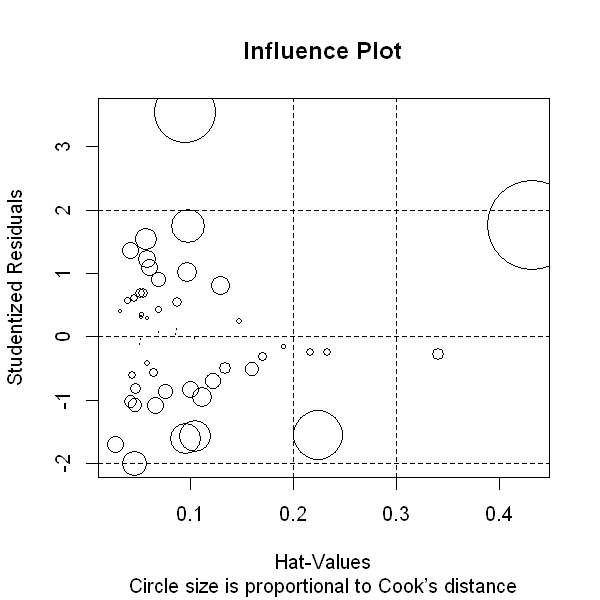

In [40]:
# Create Influence Plot: To combine Outlier, Leverage and Influence Plots
options(repr.plot.width=5, repr.plot.height=5)
influencePlot(fit, id.method="identify", main="Influence Plot",
sub="Circle size is proportional to Cook’s distance")

Influence plot. States above +2 or below –2 on the vertical axis are considered outliers. States above 0.2 or 0.3 on the horizontal axis have high leverage (unusual combinations of predictor values). Circle size is proportional to influence. Observations depicted by large circles may have disproportionate influence on the parameters estimates of the model.

## Assesing Multicolinearity
Multicollinearity can be detected using a statistic called the variance inflation factor (VIF). For any predictor variable, the square root of the VIF indicates the degree to which the confidence interval for that variable’s regression parameter is expanded relative to a model with uncorrelated predictors (hence the name). 
* VIF values are provided by the vif() function in the car package. 
* As a general rule, vif >2 indicates a multicollinearity problem

In [45]:
vif(fit)

Population Illiteracy     Income      Frost 
  1.245282   2.165848   1.345822   2.082547

In [46]:
sqrt(vif(fit)) > 2 # problem?

Population Illiteracy     Income      Frost 
     FALSE      FALSE      FALSE      FALSE

Results indicate that multicollinearity is not a problem in our dataset